# Website traffic data analysis

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [98]:
# load csv file 
df = pd.read_csv("website_traffic_data.csv")
df.head(3)

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


# Satistically review of data

In [102]:
df.describe()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.950500,3.022045,0.284767,4.027439,1.978500,0.982065
std,2.183903,3.104518,0.159781,2.887422,1.432852,0.065680
min,0.000000,0.003613,0.007868,0.068515,0.000000,0.343665
25%,3.000000,0.815828,0.161986,1.935037,1.000000,1.000000
50%,5.000000,1.993983,0.266375,3.315316,2.000000,1.000000
75%,6.000000,4.197569,0.388551,5.414627,3.000000,1.000000
max,14.000000,20.290516,0.844939,24.796182,9.000000,1.000000


In [104]:
# Rearrange columns and "Traffc Column" get first
col_first = "Traffic Source"

df = df[[col_first] + [c for c in df.columns if c != col_first]]

In [106]:
df.head(2)

,Traffic Source,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
0,Organic,5,11.051381,0.230652,3.890460,3,1.0
1,Social,4,3.429316,0.391001,8.478174,0,1.0


In [108]:
pd.unique(df["Traffic Source"])

array(['Organic', 'Social', 'Paid', 'Direct', 'Referral'], dtype=object)

# Which traffic source is contributing the highest number of page views?

In [110]:
sns.set(style = "whitegrid")

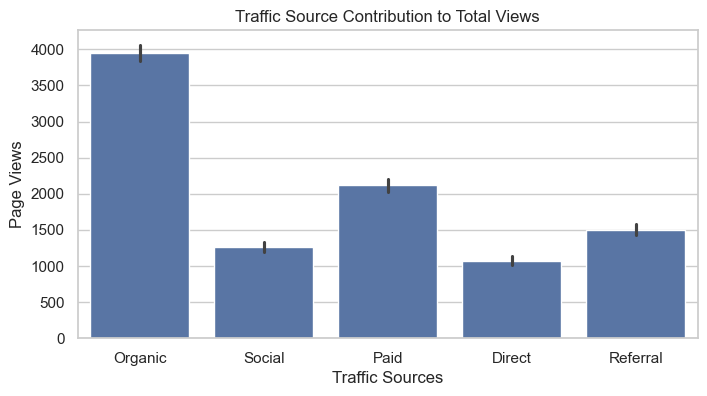

In [112]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x = "Traffic Source", y = "Page Views", estimator = np.sum)
plt.title("Traffic Source Contribution to Total Views")
plt.xlabel("Traffic Sources")
plt.ylabel("Page Views")
plt.show()


# Which acquisition channel delivers the most engaged users based on session duration?

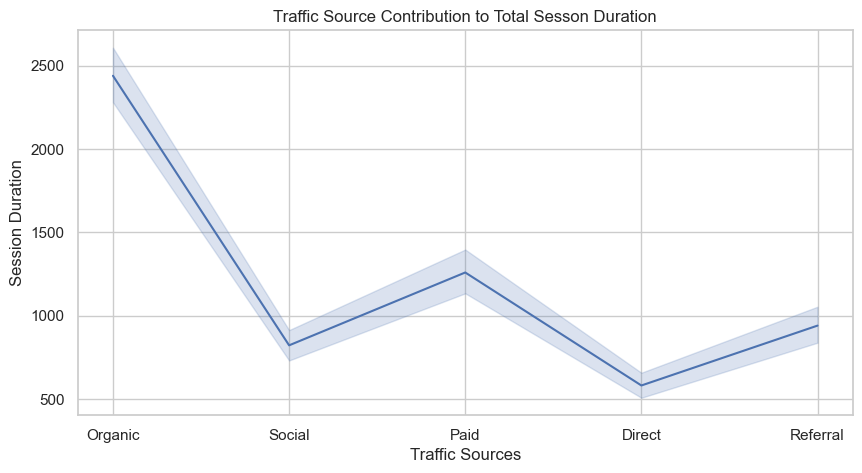

In [114]:
plt.figure(figsize = (10,5))
sns.lineplot(data =df, x="Traffic Source", y="Session Duration", estimator = np.sum)
plt.title("Traffic Source Contribution to Total Sesson Duration")
plt.xlabel("Traffic Sources")
plt.ylabel("Session Duration")
plt.show()

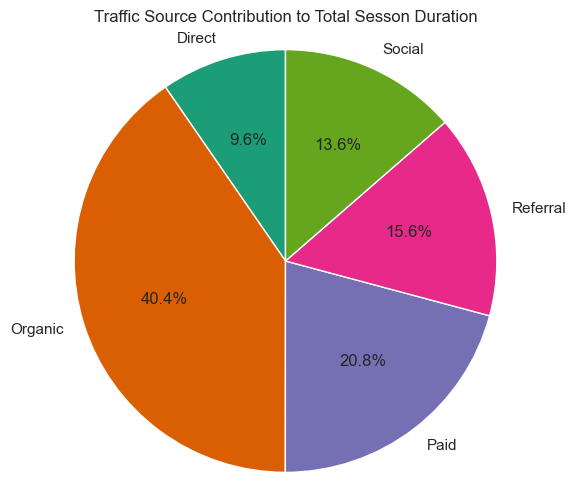

In [118]:

# Data

sizes = df.groupby("Traffic Source")["Session Duration"].sum()
labels = sizes.index
colors = plt.cm.Dark2.colors

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors[:len(sizes)],
    autopct='%1.1f%%',   # show percentages
    startangle=90        # rotate chart
)

plt.title("Traffic Source Contribution to Total Sesson Duration")
plt.axis('equal')  # ensures the pie is a circle
plt.show()


# Which traffic source drives the highest conversion rate for our website?

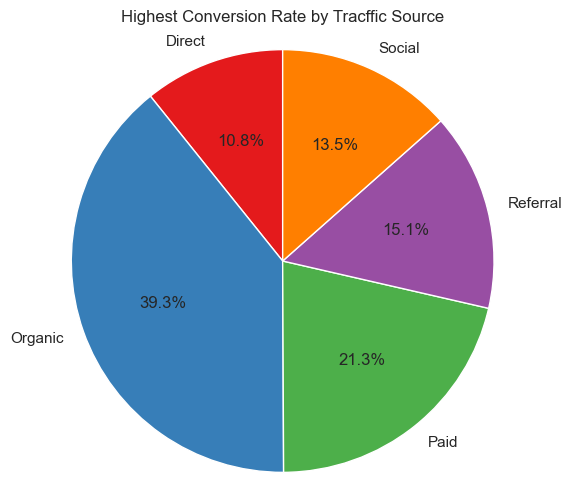

In [120]:

sizes = df.groupby("Traffic Source")["Conversion Rate"].sum()
labels = labels = sizes.index

colors = plt.cm.Set1.colors

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors[:len(sizes)],
    autopct='%1.1f%%',   # show percentages
    startangle=90        # rotate chart
)

plt.title("Highest Conversion Rate by Tracffic Source")
plt.axis('equal')  # ensures the pie is a circle
plt.show()